# Count and measure Particles in SEM images

In [133]:
%pylab inline
import mahotas as mh
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 16

Populating the interactive namespace from numpy and matplotlib


### load image and show scale bar

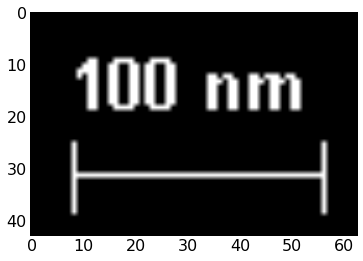

In [134]:
sem = mh.imread('data/red.tif')
figure() # datazone
figsize(4,3)
imshow(sem[710:-15,120:183])
gray()
set_scale = 2 # 50px equals 100nm

### cut off SEM data zone

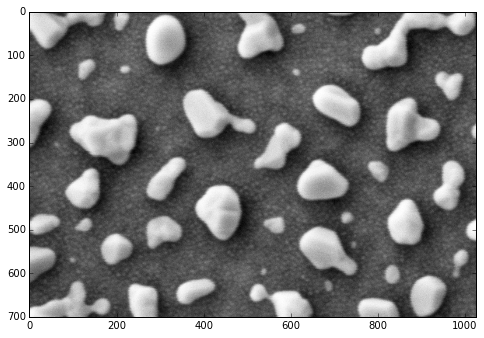

In [123]:
yimgarea = range(0,700)
sem = sem[yimgarea,:] # cut off SEM data field
figure()
figsize(8,6)
imshow(sem)
gray()

### create binary threshold image from gaussian blurred original image and identify regions

number of objects found: 42


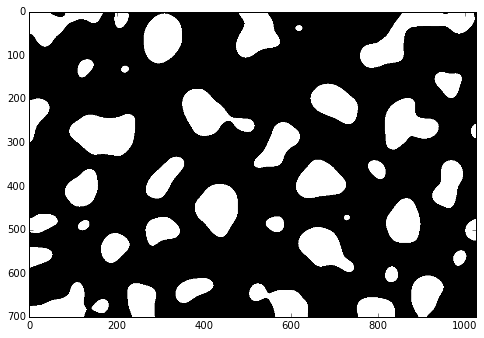

In [124]:
gaussem = mh.gaussian_filter(sem, 8).astype('uint8') # set gaussian filter as uint8
T = mh.thresholding.otsu(gaussem) # set threshold
imshow(gaussem > T)
labeled,nr_objects = mh.label(gaussem > T) # label objects
print("number of objects found: {}".format(nr_objects))

### Show overlay of regions found

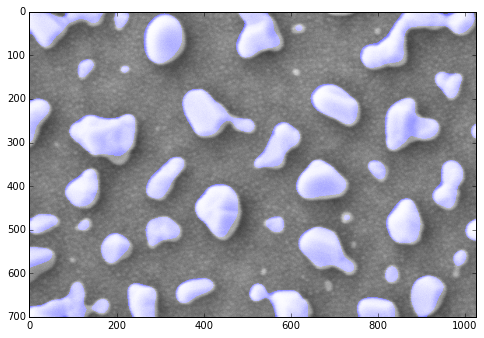

In [125]:
imshow(mh.overlay(sem, None, None, gaussem > T))

### create Histogram and calculate fill factor

Fillfactor: 32.3%


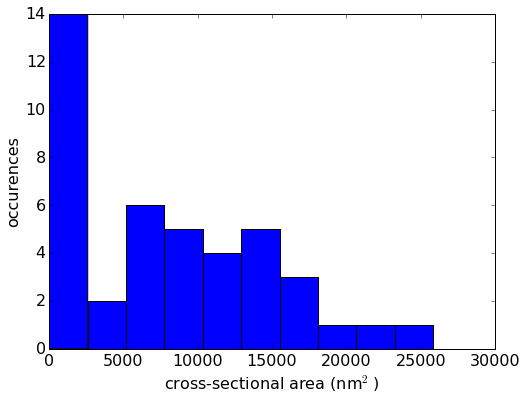

In [141]:
sizes = mh.labeled.labeled_size(labeled) # get size of labelled regions
figure()
figsize(8,6)
hist(sizes[1:]*set_scale^2,bins=10) # plot histogramm (exclude 1st since it is the black area)
fillfactor = sum(sizes[1:])/1.0/sizes[0]
xlabel('cross-sectional area (nm$^2$)')
ylabel('occurences')
print("Fillfactor: {:.1f}%".format(fillfactor*100))